# Entrega 2 Limpeza y preparación del dataset

\

In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!pip install --upgrade kaggle

In [ ]:
!kaggle competitions download -c udea-ai4eng-20242

udea-ai4eng-20242.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#descomprimir archivos
!ls
!unzip udea-ai4eng-20242.zip


kaggle.json  sample_data  udea-ai4eng-20242.zip
Archive:  udea-ai4eng-20242.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
dtr = pd.read_csv("train.csv")
#dtr.shape, dts.shape
dtr


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo
...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,medio-alto
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Secundaria (Bachillerato) incompleta,No,bajo
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,medio-bajo
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,Primaria completa,Si,bajo


In [ ]:
dtr = dtr[['FAMI_EDUCACIONMADRE', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'RENDIMIENTO_GLOBAL']]
dtr


,FAMI_EDUCACIONMADRE,ESTU_VALORMATRICULAUNIVERSIDAD,RENDIMIENTO_GLOBAL
0,Postgrado,Entre 5.5 millones y menos de 7 millones,medio-alto
1,Técnica o tecnológica incompleta,Entre 2.5 millones y menos de 4 millones,bajo
2,Secundaria (Bachillerato) completa,Entre 2.5 millones y menos de 4 millones,bajo
3,Secundaria (Bachillerato) completa,Entre 4 millones y menos de 5.5 millones,alto
4,Primaria completa,Entre 2.5 millones y menos de 4 millones,medio-bajo
...,...,...,...
692495,Secundaria (Bachillerato) incompleta,Entre 500 mil y menos de 1 millón,medio-alto
692496,Secundaria (Bachillerato) incompleta,Entre 2.5 millones y menos de 4 millones,bajo
692497,Secundaria (Bachillerato) incompleta,Entre 1 millón y menos de 2.5 millones,medio-bajo
692498,Primaria completa,Entre 2.5 millones y menos de 4 millones,bajo


In [ ]:
dtr2 = dtr[['ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA', 'RENDIMIENTO_GLOBAL']]
dtr.head()

KeyError: "['ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA'] not in index"

<Axes: xlabel='FAMI_ESTRATOVIVIENDA'>

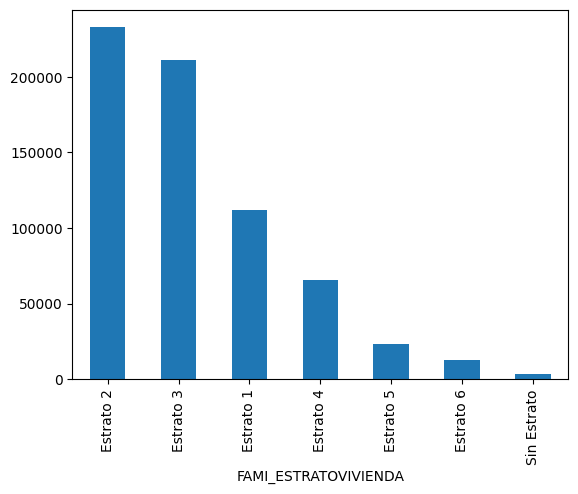

In [ ]:
#grafico la distribucion de estudiantes sgún estrato
dtr.FAMI_ESTRATOVIVIENDA.value_counts().plot(kind='bar')

<Axes: xlabel='ESTU_HORASSEMANATRABAJA'>

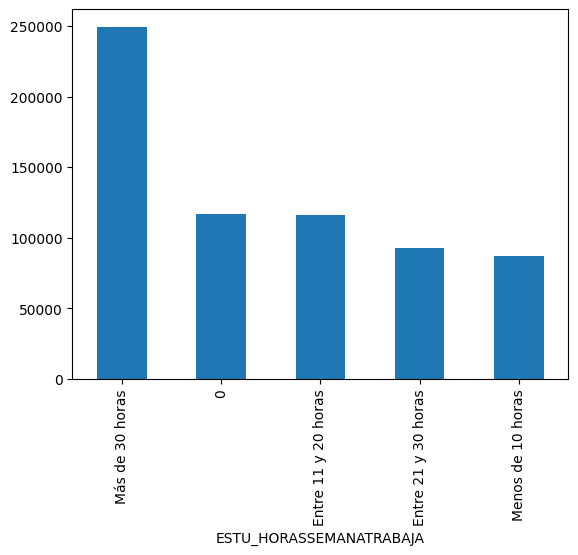

In [ ]:
dtr.ESTU_HORASSEMANATRABAJA.value_counts().plot(kind='bar')

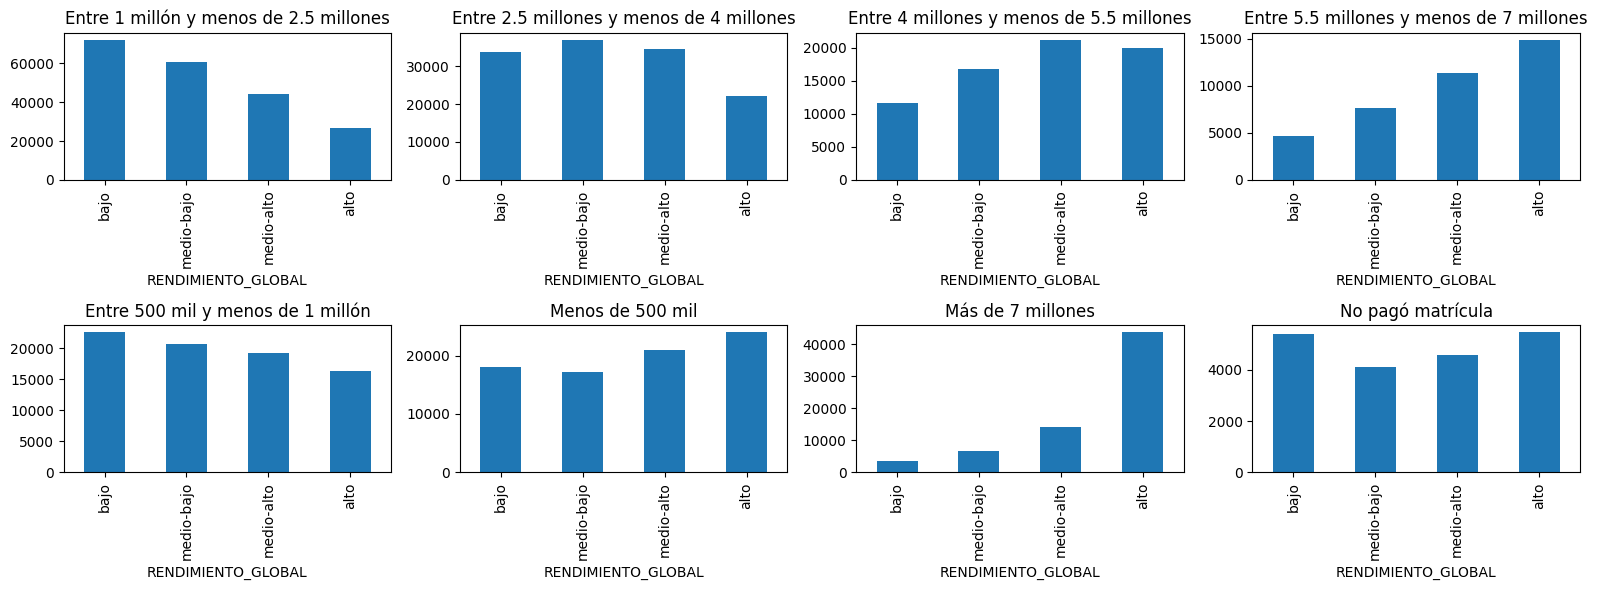

In [ ]:
from rlxutils import subplots
import matplotlib.pyplot as plt

c = sorted(dtr.ESTU_HORASSEMANATRABAJA.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    dtrCompara = dtr[dtr.ESTU_HORASSEMANATRABAJA==ci]
    dtrCompara.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

Comprendiendo el Dataset

Antes de crear el diagrama, es crucial entender qué nos dicen las variables:
  - Rendimiento_Global: Nuestra variable objetivo, es decir, lo que queremos explicar o predecir.
  - Variables socioeconómicas: Estrato socioeconómico, nivel educativo de los padres, tenencia de internet, etc. Estas variables nos darán indicios sobre el entorno en el que se desenvuelve el estudiante.
  - Variables académicas: Programa académico, departamento, horas trabajadas, etc. Estas variables nos informan sobre la carga académica y el compromiso del estudiante.

Selección de Variables para el Diagrama de Pareto

Para el diagrama de Pareto, buscamos identificar las categorías que más contribuyen a un determinado resultado. En este caso, nos interesa saber qué factores socioeconómicos o académicos más influyen en el rendimiento global bajo.

Variables prometedoras para el diagrama de Pareto:

   - Estrato socioeconómico: Es una variable clave que suele estar relacionada on el acceso a recursos y oportunidades educativas.
   Nivel educativo de los padres: El nivel educativo de los padres se asocia con las expectativas académicas y el apoyo que brindan a sus hijos.
   Horas trabajadas: El tiempo dedicado al trabajo puede influir en el tiempo disponible para el estudio.
   - Programa académico: Algunos programas pueden tener mayores demandas académicas que otros.

In [ ]:
# Ejemplo agrupando por estrato socioeconómico y rendimiento
grouped = dtr.groupby(['FAMI_ESTRATOVIVIENDA', 'RENDIMIENTO_GLOBAL']).size().reset_index(name='count')

In [ ]:
# Ordenar por la cantidad de estudiantes con bajo rendimiento
grouped = grouped.sort_values(['RENDIMIENTO_GLOBAL', 'count'], ascending=[True, False])

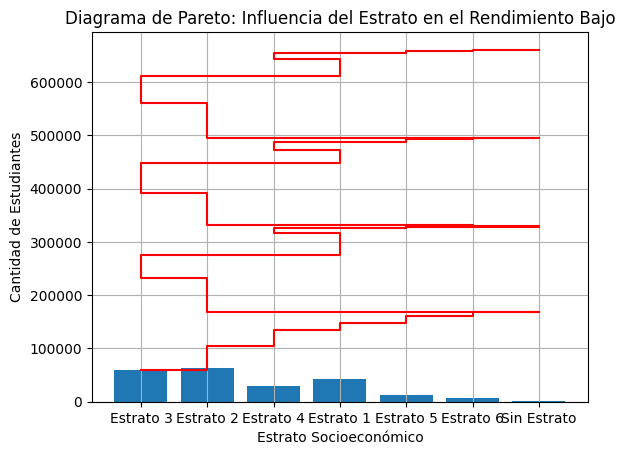

In [ ]:
# Crear un gráfico de barras
plt.bar(grouped['FAMI_ESTRATOVIVIENDA'], grouped['count'])

# Agregar una línea que muestra la frecuencia acumulada
plt.plot(grouped['FAMI_ESTRATOVIVIENDA'], grouped['count'].cumsum(), color='red', drawstyle='steps-post')

# Personalizar el gráfico
plt.xlabel('Estrato Socioeconómico')
plt.ylabel('Cantidad de Estudiantes')
plt.title('Diagrama de Pareto: Influencia del Estrato en el Rendimiento Bajo')
plt.grid(True)

plt.show()

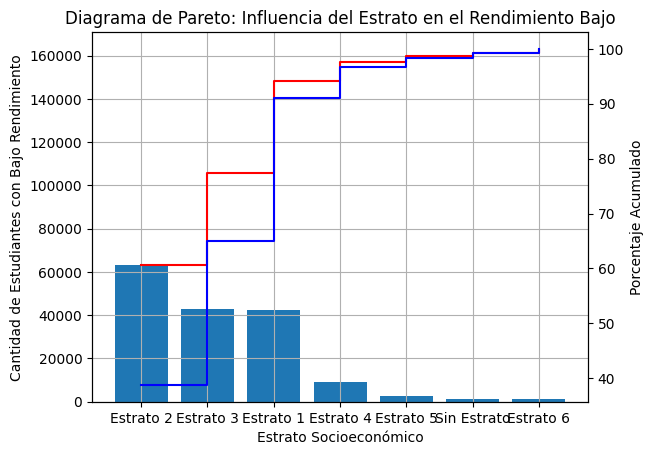

In [ ]:
# Filtrar los datos para quedarnos solo con los estudiantes con bajo rendimiento
dtr_bajo_rendimiento = dtr[dtr['RENDIMIENTO_GLOBAL'] == 'bajo']

# Agrupar por estrato socioeconómico y contar
grouped = dtr_bajo_rendimiento.groupby('FAMI_ESTRATOVIVIENDA').size().reset_index(name='count')

# Ordenar de mayor a menor cantidad
grouped = grouped.sort_values('count', ascending=False)

# Crear el diagrama de Pareto
plt.bar(grouped['FAMI_ESTRATOVIVIENDA'], grouped['count'])

# Agregar la línea de frecuencia acumulada
plt.plot(grouped['FAMI_ESTRATOVIVIENDA'], grouped['count'].cumsum(), color='red', drawstyle='steps-post')

# Personalizar el gráfico
plt.xlabel('Estrato Socioeconómico')
plt.ylabel('Cantidad de Estudiantes con Bajo Rendimiento')
plt.title('Diagrama de Pareto: Influencia del Estrato en el Rendimiento Bajo')
plt.grid(True)

# Crear un eje secundario para los porcentajes
ax2 = plt.twinx()
ax2.plot(grouped['FAMI_ESTRATOVIVIENDA'], grouped['count'].cumsum() / grouped['count'].sum() * 100, color='blue', drawstyle='steps-post')
ax2.set_ylabel('Porcentaje Acumulado')

plt.show()



## repetimos el analsis en caso de rendimiento alto

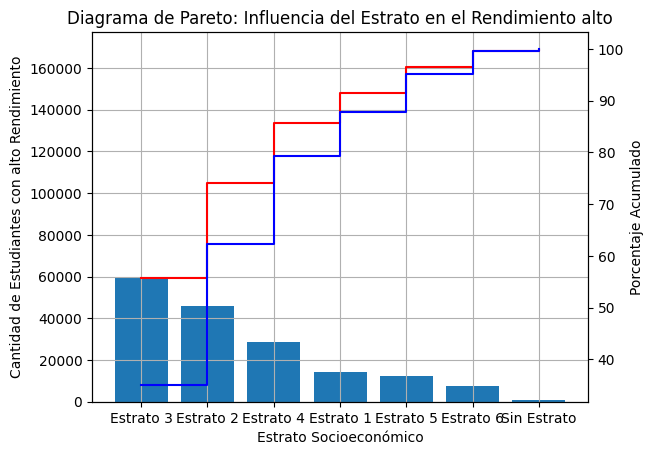

In [ ]:
# Filtrar los datos para quedarnos solo con los estudiantes con alto rendimiento
dtr_alto_rendimiento = dtr[dtr['RENDIMIENTO_GLOBAL'] == 'alto']

# Agrupar por estrato socioeconómico y contar
grouped = dtr_alto_rendimiento.groupby('FAMI_ESTRATOVIVIENDA').size().reset_index(name='count')

# Ordenar de mayor a menor cantidad
grouped = grouped.sort_values('count', ascending=False)

# Crear el diagrama de Pareto
plt.bar(grouped['FAMI_ESTRATOVIVIENDA'], grouped['count'])

# Agregar la línea de frecuencia acumulada
plt.plot(grouped['FAMI_ESTRATOVIVIENDA'], grouped['count'].cumsum(), color='red', drawstyle='steps-post')

# Personalizar el gráfico
plt.xlabel('Estrato Socioeconómico')
plt.ylabel('Cantidad de Estudiantes con alto Rendimiento')
plt.title('Diagrama de Pareto: Influencia del Estrato en el Rendimiento alto')
plt.grid(True)

# Crear un eje secundario para los porcentajes
ax2 = plt.twinx()
ax2.plot(grouped['FAMI_ESTRATOVIVIENDA'], grouped['count'].cumsum() / grouped['count'].sum() * 100, color='blue', drawstyle='steps-post')
ax2.set_ylabel('Porcentaje Acumulado')

plt.show()


In [ ]:
# Filtrar los datos para quedarnos solo con los estudiantes con alto rendimiento
dtr_alto_rendimiento = dtr[dtr['RENDIMIENTO_GLOBAL'] == 'alto']

# Agrupar por estrato socioeconómico y contar
grouped = dtr_alto_rendimiento.groupby('FAMI_ESTRATOVIVIENDA').size().reset_index(name='count')

# Ordenar de mayor a menor cantidad
grouped = grouped.sort_values('count', ascending=False)

# Crear el diagrama de Pareto
plt.bar(grouped['FAMI_ESTRATOVIVIENDA'], grouped['count'])

# Agregar la línea de frecuencia acumulada
plt.plot(grouped['FAMI_ESTRATOVIVIENDA'], grouped['count'].cumsum(), color='red', drawstyle='steps-post')

# Personalizar el gráfico
plt.xlabel('Estrato Socioeconómico')
plt.ylabel('Cantidad de Estudiantes con alto Rendimiento')
plt.title('Diagrama de Pareto: Influencia del Estrato en el Rendimiento alto')
plt.grid(True)

# Crear un eje secundario para los porcentajes
ax2 = plt.twinx()
ax2.plot(grouped['FAMI_ESTRATOVIVIENDA'], grouped['count'].cumsum() / grouped['count'].sum() * 100, color='blue', drawstyle='steps-post')
ax2.set_ylabel('Porcentaje Acumulado')

plt.show()

In [ ]:
datosMadre = dtr[['FAMI_EDUCACIONMADRE', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'RENDIMIENTO_GLOBAL']]
datosMadre.head()

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('FAMI_EDUCACIONMADRE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='FAMI_EDUCACIONMADRE'>

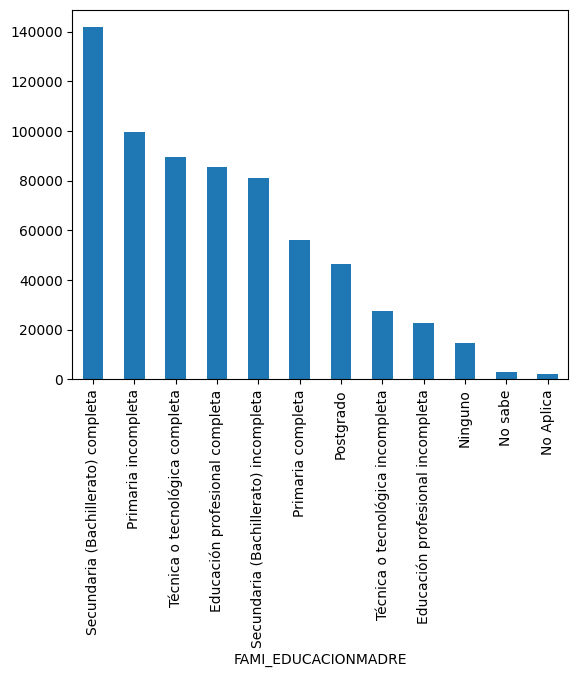

In [ ]:
dtr.FAMI_EDUCACIONMADRE.value_counts().plot(kind='bar')

<Axes: xlabel='ESTU_VALORMATRICULAUNIVERSIDAD'>

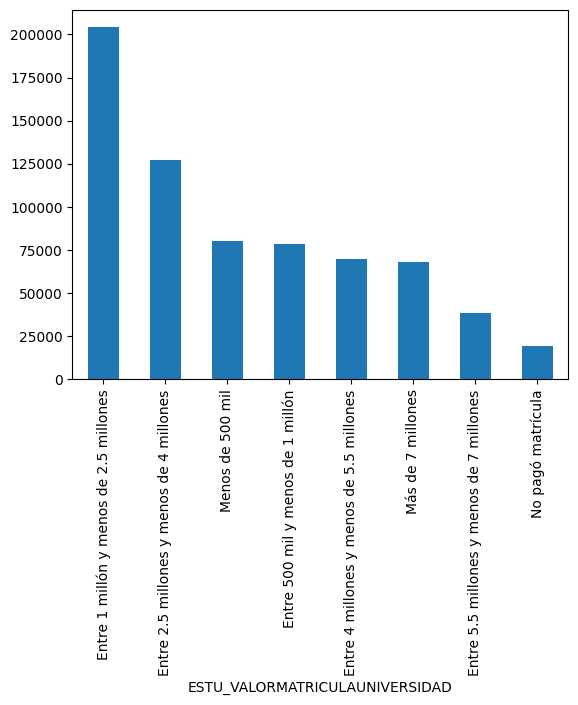

In [ ]:
dtr.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts().plot(kind='bar')

## catergorizar y clasificar
Debemos hacer limpieza de l dataset que implica eliminar información que considermeso no relevante.
En la sigueinte instrcción reunimos todos las carreras en categorias gnerales que enmarquen el area de estudio. para permitirnos tiempos de analisis mejores,

In [ ]:
def clasificar_programa(programa):
    # Utiliza la clasificación proporcionada previamente para asignar la categoría
    if programa in ["AGRONOMÍA", "ZOOTECNIA","INGENIERÍA AGRONÓMICA","INGENIERÍA AGROINDUSTRIAL", "INGENIERÍA FORESTAL", "MEDICINA VETERINARIA Y ZOOTECNIA", "PRODUCCIÓN AGROINDUSTRIAL"]: # Lista de programas de Agricultura y Veterinaria
        return "Agricultura y Veterinaria"
    elif programa in ["ARTES ESCÉNICAS", "ARTES VISUALES","DISEÑO","FILOSOFÍA","HISTORIA","LENGUA CASTELLANA Y LITERATURA", "LINGÜÍSTICA", "LITERATURA", "MÚSICA", "TEATRO"]: # Lista de programas de Artes y Humanidades
        return "Artes y Humanidades"
    elif programa in ["BACTERIOLOGÍA", "BIOLOGÍA", "BIOLOGÍA MARINA","CIENCIA DE LA COMPUTACIÓN E INTELIGENCIA ARTIFICIAL", "CIENCIA DE LA INFORMACIÓN Y BIBLIOTECOLOGÍA", "CIENCIAS DE LA TIERRA", "CIENCIAS DEL DEPORTE Y DE LA EDUCACIÓN FÍSICA", "CIENCIAS MILITARES", "CIENCIAS NAVALES PARA OFICIALES DE INFANTERÍA DE MARINA", "CIENCIAS NAVALES PARA OFICIALES MERCANTES", "CIENCIAS NAVALES PARA OFICIALES NAVALES", "ECOLOGÍA", "FÍSICA", "GEOLOGÍA", "INGENIERÍA BIOMÉDICA", "INGENIERÍA BIOTECNOLOGÍA", "INGENIERÍA CIVIL","INGENIERÍA ELÉCTRICA","INGENIERÍA ELECTRÓNICA", "INGENIERÍA GEOFÍSICA", "INGENIERÍA INDUSTRIAL",  "INGENIERÍA INFORMÁTICA", "INGENIERÍA MECÁNICA",  "INGENIERÍA MECATRÓNICA", "INGENIERÍA QUÍMICA",  "INGENIERÍA DE ALIMENTOS", "INGENIERÍA DE MINAS Y METALURGIA", "INGENIERÍA DE PETRÓLEOS", "INGENIERÍA DE SISTEMAS", "INGENIERÍA DE SISTEMAS Y COMPUTACIÓN", "INGENIERÍA EN DISEÑO DE PRODUCTO", "INGENIERÍA EN SONIDO", "INGENIERÍA EN TELEMÁTICA","MATEMÁTICAS", "MICROBIOLOGÍA", "QUÍMICA","QUÍMICA FARMACÉUTICA"]: # Lista de programas Ciencias
        return "Ciencias"
    elif programa in["BACTERIOLOGÍA Y LABORATORIO CLÍNICO", "ENFERMERÍA", "FISIOTERAPIA","FONOAUDIOLOGÍA", "INSTRUMENTACIÓN QUIRÚRGICA", "MEDICINA", "ODONTOLOGÍA", "OPTOMETRÍA", "OPTOMETRÍA Y AUDIOLOGÍA", "TERAPIA OCUPACIONAL", "TERAPIA RESPIRATORIA"]: #ciecias d ela salud
        return  "Ciencias de la salud"
    elif programa in["COMUNICACIÓN AUDIOVISUAL",  "COMUNICACIÓN SOCIAL", "COMUNICACIÓN SOCIAL - PERIODISMO",  "COMUNICACIÓN SOCIAL Y PERIODISMO", "PUBLICIDAD"]:
        return "Comunicación y Periodismo"
    elif programa in["CIENCIA POLÍTICA", "CIENCIA POLÍTICA Y GOBIERNO", "CIENCIA POLÍTICA Y RELACIONES INTERNACIONALES","DERECHO", "DERECHO Y CIENCIAS POLÍTICAS", "GOBIERNO Y RELACIONES INTERNACIONALES", "RELACIONES INTERNACIONALES","RELACIONES INTERNACIONALES Y ESTUDIOS POLÍTICOS"]:
        return  "Derecho y Ciencias Políticas"
    elif programa in[ "ADMINISTRACIÓN",  "ADMINISTRACIÓN DE EMPRESAS", "ADMINISTRACIÓN DE EMPRESAS AGROPECUARIAS", "ADMINISTRACIÓN DE EMPRESAS COMERCIALES","ADMINISTRACIÓN DE EMPRESAS TURÍSTICAS", "ADMINISTRACIÓN DE EMPRESAS TURÍSTICAS Y HOTELERAS", "ADMINISTRACIÓN DE LA CALIDAD", "ADMINISTRACIÓN DE LA SEGURIDAD SOCIAL", "ADMINISTRACIÓN DE NEGOCIOS", "ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES", "ADMINISTRACIÓN EN FINANZAS Y NEGOCIOS INTERNACIONALES","ADMINISTRACIÓN EN SALUD", "ADMINISTRACIÓN EN SALUD OCUPACIONAL","ADMINISTRACIÓN FINANCIERA",  "ADMINISTRACIÓN INDUSTRIAL",  "ADMINISTRACIÓN MARÍTIMA Y FLUVIAL", "ADMINISTRACIÓN PÚBLICA","ADMINISTRACIÓN PÚBLICA TERRITORIAL", "CONTADURÍA PÚBLICA","CONTADURÍA PÚBLICA Y FINANZAS INTERNACIONALES", "ECONOMÍA", "ECONOMÍA Y FINANZAS INTERNACIONALES","FINANZAS","FINANZAS Y COMERCIO EXTERIOR", "FINANZAS Y COMERCIO INTERNACIONAL","FINANZAS Y RELACIONES INTERNACIONALES", "GESTIÓN DE LA SEGURIDAD Y ANÁLISIS SOCIO POLÍTICO","LOGÍSTICA EMPRESARIAL", "MERCADEO","MERCADEO Y NEGOCIOS INTERNACIONALES","MERCADEO Y PUBLICIDAD","MERCADEO PUBLICIDAD Y VENTAS","NEGOCIOS INTERNACIONALES","NEGOCIOS INTERNACIONALES SEGUNDO CICLO","PROFESIONALES EN ADMINISTRACIÓN DE EMPRESAS","PROFESIONALES EN FINANZAS Y NEGOCIOS INTERNACIONALES","PROFESIONALES EN MARKETING Y NEGOCIOS INTERNACIONALES"]:
        return "economia_administracion"
    elif programa in["EDUCACIÓN BÁSICA",  "EDUCACIÓN BÁSICA CON ÉNFASIS EN CIENCIAS NATURALES Y EDUCACIÓN AMBIENTAL",    "EDUCACIÓN BÁSICA CON ÉNFASIS EN CIENCIAS SOCIALES", "EDUCACIÓN BÁSICA CON ÉNFASIS EN EDUCACIÓN ARTÍSTICA", "EDUCACIÓN BÁSICA CON ÉNFASIS EN EDUCACIÓN FÍSICA, RECREACIÓN Y DEPORTES", "EDUCACIÓN BÁSICA CON ÉNFASIS EN HUMANIDADES: LENGUA CASTELLANA", "EDUCACIÓN BÁSICA CON ÉNFASIS EN HUMANIDADES E IDIOMAS",  "EDUCACIÓN BÁSICA CON ÉNFASIS EN HUMANIDADES, LENGUA CASTELLANA E INGLÉS",  "EDUCACIÓN BÁSICA CON ÉNFASIS EN INGLÉS", "EDUCACIÓN BÁSICA CON ÉNFASIS EN MATEMÁTICAS", "EDUCACIÓN BÁSICA CON ÉNFASIS EN MATEMÁTICAS, HUMANIDADES Y LENGUA CASTELLANA", "EDUCACIÓN BÁSICA EN ÉNFASIS EN EDUCACIÓN FÍSICA, RECREACIÓN Y DEPORTE", "EDUCACIÓN BÁSICA PRIMARIA", "EDUCACIÓN ESPECIAL",    "EDUCACIÓN FÍSICA",   "EDUCACIÓN FÍSICA, DEPORTES Y RECREACIÓN",  "EDUCACIÓN FÍSICA, RECREACIÓN Y DEPORTE", "ENTRENAMIENTO DEPORTIVO","LICENCIATURA EN EDUCACIÓN"]:      # ... Agrega más condiciones para las demás áreas de estudio
        return "Educacion"
    else:
        return "Sin clasificar"





In [ ]:
dtr

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo
...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,medio-alto
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Secundaria (Bachillerato) incompleta,No,bajo
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,medio-bajo
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,Primaria completa,Si,bajo


# Entrega 2 *Limpieza y preparaciópn de datos*

In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#descomprimir archivos
!ls
!unzip udea-ai4eng-20242.zip

sample_data  submission_example.csv  test.csv  train.csv  udea-ai4eng-20242.zip
Archive:  udea-ai4eng-20242.zip
replace submission_example.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
df = pd.read_csv("train.csv")


## Limpieza de Datos
Se identifican  los valores faltantes  y se procede a rellena eliminar


In [ ]:
# trabajamos con el dataset cargado llamado 'df'

#Buscamos las variables catagoricas
categorical_features = df.select_dtypes(include=['object']).columns
categorical_features


Index(['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_EDUCACIONMADRE', 'ESTU_PAGOMATRICULAPROPIO',
       'RENDIMIENTO_GLOBAL'],
      dtype='object')

In [ ]:
# Eliminamos columanas no necesarias para generar el modelo por no
df = df.drop('ID' , axis= 1)
df = df.drop('PERIODO', axis = 1)
df = df.drop('FAMI_EDUCACIONPADRE', axis = 1)
df = df.drop('FAMI_EDUCACIONMADRE', axis =1)
df = df.drop('ESTU_PRGM_ACADEMICO', axis =1)

In [ ]:
#  Identificación de valores faltantes o nulos
print("Valores faltantes por columna:")
print(df.isna().sum())


Valores faltantes por columna:
ESTU_PRGM_DEPARTAMENTO                0
ESTU_VALORMATRICULAUNIVERSIDAD     6287
ESTU_HORASSEMANATRABAJA           30857
FAMI_ESTRATOVIVIENDA              32137
FAMI_TIENEINTERNET                26629
ESTU_PAGOMATRICULAPROPIO           6498
RENDIMIENTO_GLOBAL                    0
dtype: int64


###Trabajamos con la columna 'FAMI_ESTRATOVIVIENDA'

In [ ]:
columna_estrato = df['FAMI_ESTRATOVIVIENDA']

In [ ]:
valores_unicos = columna_estrato.unique()

In [ ]:
print(valores_unicos)

['Estrato 3' 'Estrato 4' 'Estrato 5' 'Estrato 2' 'Estrato 1' nan
 'Estrato 6' 'Sin Estrato']


In [ ]:
#Rellenar los valores faltantes: Utiliza el método fillna() con el valor: 'Estarto 3'
df['FAMI_ESTRATOVIVIENDA'] = columna_estrato.fillna('Estrato 3')

In [ ]:
# Crear un diccionario de mapeo de los valores categóricos a números
mapa_estrato = {
    "Estrato 1": 1,
    "Estrato 2": 2,
    "Estrato 3": 3,
    "Estrato 4": 4,
    "Estrato 5": 5,
    "Estrato 6": 6
}

# Aplicar el mapeo a la columna 'FAMI_ESTRATOVIVIENDA'
df['FAMI_ESTRATOVIVIENDA'] = df['FAMI_ESTRATOVIVIENDA'].map(mapa_estrato)

# Verificar la conversión
print(df['FAMI_ESTRATOVIVIENDA'].head())

# Guardar el DataFrame con la columna convertida
#df.to_csv('dataset_limpio_estrato.csv', index=False)
#print("La columna 'FAMI_ESTRATOVIVIENDA' ha sido convertida a valores numéricos y guardada.")


0    3.0
1    3.0
2    3.0
3    4.0
4    3.0
Name: FAMI_ESTRATOVIVIENDA, dtype: float64


## Trabajamos con Columna 'ESTU_HORASSEMANATRABAJA'

In [ ]:
columna_horas_trabaja = df['ESTU_HORASSEMANATRABAJA']
valores_unicos = columna_horas_trabaja.unique()
print(valores_unicos)

['Menos de 10 horas' '0' 'Más de 30 horas' 'Entre 21 y 30 horas'
 'Entre 11 y 20 horas' nan]


In [ ]:
#calculamos la moda para lueo rreemplazarla en la columna elegida
moda_horas_trabaja = df['ESTU_HORASSEMANATRABAJA'].mode()[0]
print(f"La moda en la columna 'ESTU_HORASSEMANATRABAJA' es: {moda_horas_trabaja}")

La moda en la columna 'ESTU_HORASSEMANATRABAJA' es: Más de 30 horas


In [ ]:
#Rellenar los valores faltantes: Utiliza el método fillna() con el valor: 'ESTU_HORASSEMANATRABAJA'
df['ESTU_HORASSEMANATRABAJA'] = columna_horas_trabaja.fillna('Más de 30 horas')

In [ ]:
# Crear un diccionario de mapeo de los valores categóricos a números
cmap_ESTU_HORASSEMANATRABAJA = {
                      '0' : 0,
                      'Menos de 10 horas' : 5 ,
                      'Entre 11 y 20 horas': 15,
                      'Entre 21 y 30 horas': 25,
                      'Más de 30 horas' : 30
                                }
df['ESTU_HORASSEMANATRABAJA'] = df['ESTU_HORASSEMANATRABAJA'].map(cmap_ESTU_HORASSEMANATRABAJA)
print(df['ESTU_HORASSEMANATRABAJA'].head())

0     5
1     0
2    30
3     0
4    25
Name: ESTU_HORASSEMANATRABAJA, dtype: int64


# trabajamos con la columna 'ESTU_VALORMATRICULAUNIVERSIDAD'

In [ ]:
# IDeditficaos valor atipicos dentro de las respuestas
columna_valor_matricula = df['ESTU_VALORMATRICULAUNIVERSIDAD']
valores_unicos = columna_valor_matricula.unique()
print(valores_unicos)

['Entre 5.5 millones y menos de 7 millones'
 'Entre 2.5 millones y menos de 4 millones'
 'Entre 4 millones y menos de 5.5 millones' 'Más de 7 millones'
 'Entre 1 millón y menos de 2.5 millones'
 'Entre 500 mil y menos de 1 millón' 'Menos de 500 mil'
 'No pagó matrícula' nan]


In [ ]:
#calculamos la moda para lueo rreemplazarla en la columna elegida
moda_ESTU_VALORMATRICULAUNIVERSIDAD = df['ESTU_VALORMATRICULAUNIVERSIDAD'].mode()[0]
print(f"La moda en la columna 'ESTU_VALORMATRICULAUNIVERSIDAD' es: {moda_ESTU_VALORMATRICULAUNIVERSIDAD }")

La moda en la columna 'ESTU_VALORMATRICULAUNIVERSIDAD' es: Entre 1 millón y menos de 2.5 millones


In [ ]:
#Rellenamos los valores faltantes: Utiliza el método fillna() con el valor: 'ESTU_VALORMATRICULAUNIVERSIDAD'
df['ESTU_VALORMATRICULAUNIVERSIDAD'] = columna_valor_matricula.fillna('Entre 1 millón y menos de 2.5 millones')

In [ ]:
# Crear un diccionario de mapeo de los valores categóricos a números
cmap = {'Entre 1 millón y menos de 2.5 millones': 1.75,
 'Entre 2.5 millones y menos de 4 millones': 3.25,
 'Menos de 500 mil': .250,
 'Entre 500 mil y menos de 1 millón': .75,
 'Entre 4 millones y menos de 5.5 millones': 4.75,
 'Más de 7 millones': 7.75,
 'Entre 5.5 millones y menos de 7 millones': 6.25,
 'No pagó matrícula': 0
 }

df.ESTU_VALORMATRICULAUNIVERSIDAD = np.r_[[cmap[i] for i in df.ESTU_VALORMATRICULAUNIVERSIDAD]]
df.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts()

,count
ESTU_VALORMATRICULAUNIVERSIDAD,
1.75,210335
3.25,127430
0.25,80263
0.75,78704
4.75,69736
7.75,68014
6.25,38490
0.00,19528


# Trabajamos con la columna 'FAMI_TIENEINTERNET'

In [ ]:
#calculamos la moda para lueo rreemplazarla en la columna elegida
moda_FAMI_TIENEINTERNET = df['FAMI_TIENEINTERNET'].mode()[0]
print(f"La moda en la columna 'FAMI_TIENEINTERNET' es: {moda_FAMI_TIENEINTERNET }")

La moda en la columna 'FAMI_TIENEINTERNET' es: Si


In [ ]:
#llenamos los valores faltantes: Utiliza el método fillna() con el valor: 'ESTU_VALORMATRICULAUNIVERSIDAD'
columna_FAMI_TIENEINTERNET = df['FAMI_TIENEINTERNET']
df['FAMI_TIENEINTERNET'] = columna_FAMI_TIENEINTERNET.fillna('Si')

In [ ]:
cmap_FAMI_TIENEINTERNET = {'Si': 1,
        'No': 0
 }

df.FAMI_TIENEINTERNET = np.r_[[cmap_FAMI_TIENEINTERNET[i] for i in df.FAMI_TIENEINTERNET]]
df.FAMI_TIENEINTERNET.value_counts()

,count
FAMI_TIENEINTERNET,
1,619143
0,73357


# trabajamos con columna ESTU_PAGOMATRICULAPROPIO


In [ ]:
#calculamos la moda para lueo rreemplazarla en la columna elegida
moda_ESTU_PAGOMATRICULAPROPIO = df['ESTU_PAGOMATRICULAPROPIO'].mode()[0]
print(f"La moda en la columna 'ESTU_PAGOMATRICULAPROPIO' es: {moda_ESTU_PAGOMATRICULAPROPIO }")

La moda en la columna 'ESTU_PAGOMATRICULAPROPIO' es: No


In [ ]:
#llenamos los valores faltantes: Utiliza el método fillna() con el valor: 'ESTU_PAGOMATRICULAPROPIO'
columna_ESTU_PAGOMATRICULAPROPIO = df['ESTU_PAGOMATRICULAPROPIO']
df['ESTU_PAGOMATRICULAPROPIO'] = columna_ESTU_PAGOMATRICULAPROPIO.fillna('No')

In [ ]:
# Crear un diccionario de mapeo de los valores categóricos a números
cmap_ESTU_PAGOMATRICULAPROPIO = {
        'Si': 1,
        'No': 0
 }
df['ESTU_PAGOMATRICULAPROPIO'] = df['ESTU_PAGOMATRICULAPROPIO'].map(cmap_ESTU_PAGOMATRICULAPROPIO)

#imprimimos resultdo dl mapero
print(df['ESTU_PAGOMATRICULAPROPIO'].head())


0    0
1    0
2    0
3    0
4    0
Name: ESTU_PAGOMATRICULAPROPIO, dtype: int64


In [ ]:
df.head()

,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,BOGOTÁ,6.25,5,3.0,1,0,medio-alto
1,ATLANTICO,3.25,0,3.0,0,0,bajo
2,BOGOTÁ,3.25,30,3.0,1,0,bajo
3,SANTANDER,4.75,0,4.0,1,0,alto
4,ANTIOQUIA,3.25,25,3.0,1,0,medio-bajo


# Trabajamos con la columna ESTU_PRGM_DEPARTAMENTO

In [ ]:
# prompt: quiero saber que variables hay n la columna 'ESTU_PRGM_DEPARTAMENTO'

print(df['ESTU_PRGM_DEPARTAMENTO'].unique())


['BOGOTÁ' 'ATLANTICO' 'SANTANDER' 'ANTIOQUIA' 'HUILA' 'SUCRE' 'CAQUETA'
 'CUNDINAMARCA' 'BOLIVAR' 'TOLIMA' 'VALLE' 'QUINDIO' 'RISARALDA' 'CORDOBA'
 'META' 'LA GUAJIRA' 'BOYACA' 'NARIÑO' 'CAUCA' 'NORTE SANTANDER' 'CESAR'
 'PUTUMAYO' 'CALDAS' 'MAGDALENA' 'CHOCO' 'CASANARE' 'ARAUCA' 'GUAVIARE'
 'AMAZONAS' 'VAUPES' 'SAN ANDRES']


In [ ]:
# prompt: utiliza one hot encoder o cuaqueir variante onhot para crear matrices de 1 o 0 para identificar los valores posibles de la columna ''ESTU_PRGM-DEPARTAMENTO

import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Crea un objeto OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

# Ajusta y transforma la columna 'ESTU_PRGM_DEPARTAMENTO'
encoded_data = enc.fit_transform(df[['ESTU_PRGM_DEPARTAMENTO']])

# Convierte la matriz dispersa a un DataFrame
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=enc.get_feature_names_out(['ESTU_PRGM_DEPARTAMENTO']))

# Concatena el DataFrame codificado con el DataFrame original
df = pd.concat([df, encoded_df], axis=1)

# Elimina la columna original 'ESTU_PRGM_DEPARTAMENTO'
df = df.drop('ESTU_PRGM_DEPARTAMENTO', axis=1)

# Imprime las primeras filas del DataFrame resultante
print(df.head())


             ESTU_VALORMATRICULAUNIVERSIDAD ESTU_HORASSEMANATRABAJA  \
0  Entre 5.5 millones y menos de 7 millones       Menos de 10 horas   
1  Entre 2.5 millones y menos de 4 millones                       0   
2  Entre 2.5 millones y menos de 4 millones         Más de 30 horas   
3  Entre 4 millones y menos de 5.5 millones                       0   
4  Entre 2.5 millones y menos de 4 millones     Entre 21 y 30 horas   

   FAMI_ESTRATOVIVIENDA FAMI_TIENEINTERNET ESTU_PAGOMATRICULAPROPIO  \
0                   3.0                 Si                       No   
1                   3.0                 No                       No   
2                   3.0                 Si                       No   
3                   4.0                 Si                       No   
4                   3.0                 Si                       No   

  RENDIMIENTO_GLOBAL  ESTU_PRGM_DEPARTAMENTO_AMAZONAS  \
0         medio-alto                              0.0   
1               bajo            

In [ ]:
df.head()

,ESTU_PRGM_ACADEMICO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL,ESTU_PRGM_DEPARTAMENTO_AMAZONAS,ESTU_PRGM_DEPARTAMENTO_ANTIOQUIA,ESTU_PRGM_DEPARTAMENTO_ARAUCA,...,ESTU_PRGM_DEPARTAMENTO_NORTE SANTANDER,ESTU_PRGM_DEPARTAMENTO_PUTUMAYO,ESTU_PRGM_DEPARTAMENTO_QUINDIO,ESTU_PRGM_DEPARTAMENTO_RISARALDA,ESTU_PRGM_DEPARTAMENTO_SAN ANDRES,ESTU_PRGM_DEPARTAMENTO_SANTANDER,ESTU_PRGM_DEPARTAMENTO_SUCRE,ESTU_PRGM_DEPARTAMENTO_TOLIMA,ESTU_PRGM_DEPARTAMENTO_VALLE,ESTU_PRGM_DEPARTAMENTO_VAUPES
0,ENFERMERIA,6.25,5,3.0,1,0,medio-alto,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,DERECHO,3.25,0,3.0,0,0,bajo,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,MERCADEO Y PUBLICIDAD,3.25,30,3.0,1,0,bajo,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ADMINISTRACION DE EMPRESAS,4.75,0,4.0,1,0,alto,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,PSICOLOGIA,3.25,25,3.0,1,0,medio-bajo,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Trabajmos con la columa columna 'ESTU_PRGM_ACADEMICO'

In [ ]:

# Verificación de la limpieza
print("Verificación de datos faltantes después de la limpieza:")
print(df.isna().sum())
#print(df.head())



In [ ]:
# Guardar el DataFrame limpio en un nuevo archivo CSV
#df.to_csv('dataset_limpio.csv', index=False)

## Clasificación de por carreras
En el codigo siguiente agrupamos y clasificamos por carreras la informació para mejorar los tiempos de procesamiento, en el entndido que en las pruebas saer pro tambien se usa una clasiifcación por aresas fromativas apra realizar sus comparaciones y ldiseñar las mismas pruebas

In [ ]:
def clasificar_programa(programa):
    # Utiliza la clasificación proporcionada previamente para asignar la categoría
    if programa in ["AGRONOMÍA", "ZOOTECNIA","INGENIERÍA AGRONÓMICA","INGENIERÍA AGROINDUSTRIAL", "INGENIERÍA FORESTAL", "MEDICINA VETERINARIA Y ZOOTECNIA", "PRODUCCIÓN AGROINDUSTRIAL"]: # Lista de programas de Agricultura y Veterinaria
        return "Agricultura y Veterinaria"
    elif programa in ["ARTES ESCÉNICAS", "ARTES VISUALES","DISEÑO","FILOSOFÍA","HISTORIA","LENGUA CASTELLANA Y LITERATURA", "LINGÜÍSTICA", "LITERATURA", "MÚSICA", "TEATRO"]: # Lista de programas de Artes y Humanidades
        return "Artes y Humanidades"
    elif programa in ["BACTERIOLOGÍA", "BIOLOGÍA", "BIOLOGÍA MARINA","CIENCIA DE LA COMPUTACIÓN E INTELIGENCIA ARTIFICIAL", "CIENCIA DE LA INFORMACIÓN Y BIBLIOTECOLOGÍA", "CIENCIAS DE LA TIERRA", "CIENCIAS DEL DEPORTE Y DE LA EDUCACIÓN FÍSICA", "CIENCIAS MILITARES", "CIENCIAS NAVALES PARA OFICIALES DE INFANTERÍA DE MARINA", "CIENCIAS NAVALES PARA OFICIALES MERCANTES", "CIENCIAS NAVALES PARA OFICIALES NAVALES", "ECOLOGÍA", "FÍSICA", "GEOLOGÍA", "INGENIERÍA BIOMÉDICA", "INGENIERÍA BIOTECNOLOGÍA", "INGENIERÍA CIVIL","INGENIERÍA ELÉCTRICA","INGENIERÍA ELECTRÓNICA", "INGENIERÍA GEOFÍSICA", "INGENIERÍA INDUSTRIAL",  "INGENIERÍA INFORMÁTICA", "INGENIERÍA MECÁNICA",  "INGENIERÍA MECATRÓNICA", "INGENIERÍA QUÍMICA",  "INGENIERÍA DE ALIMENTOS", "INGENIERÍA DE MINAS Y METALURGIA", "INGENIERÍA DE PETRÓLEOS", "INGENIERÍA DE SISTEMAS", "INGENIERÍA DE SISTEMAS Y COMPUTACIÓN", "INGENIERÍA EN DISEÑO DE PRODUCTO", "INGENIERÍA EN SONIDO", "INGENIERÍA EN TELEMÁTICA","MATEMÁTICAS", "MICROBIOLOGÍA", "QUÍMICA","QUÍMICA FARMACÉUTICA"]: # Lista de programas Ciencias
        return "Ciencias"
    elif programa in["BACTERIOLOGÍA Y LABORATORIO CLÍNICO", "ENFERMERÍA", "FISIOTERAPIA","FONOAUDIOLOGÍA", "INSTRUMENTACIÓN QUIRÚRGICA", "MEDICINA", "ODONTOLOGÍA", "OPTOMETRÍA", "OPTOMETRÍA Y AUDIOLOGÍA", "TERAPIA OCUPACIONAL", "TERAPIA RESPIRATORIA"]: #ciecias d ela salud
        return  "Ciencias de la salud"
    elif programa in["COMUNICACIÓN AUDIOVISUAL",  "COMUNICACIÓN SOCIAL", "COMUNICACIÓN SOCIAL - PERIODISMO",  "COMUNICACIÓN SOCIAL Y PERIODISMO", "PUBLICIDAD"]:
        return "Comunicación y Periodismo"
    elif programa in["CIENCIA POLÍTICA", "CIENCIA POLÍTICA Y GOBIERNO", "CIENCIA POLÍTICA Y RELACIONES INTERNACIONALES","DERECHO", "DERECHO Y CIENCIAS POLÍTICAS", "GOBIERNO Y RELACIONES INTERNACIONALES", "RELACIONES INTERNACIONALES","RELACIONES INTERNACIONALES Y ESTUDIOS POLÍTICOS"]:
        return  "Derecho y Ciencias Políticas"
    elif programa in[ "ADMINISTRACIÓN",  "ADMINISTRACIÓN DE EMPRESAS", "ADMINISTRACIÓN DE EMPRESAS AGROPECUARIAS", "ADMINISTRACIÓN DE EMPRESAS COMERCIALES","ADMINISTRACIÓN DE EMPRESAS TURÍSTICAS", "ADMINISTRACIÓN DE EMPRESAS TURÍSTICAS Y HOTELERAS", "ADMINISTRACIÓN DE LA CALIDAD", "ADMINISTRACIÓN DE LA SEGURIDAD SOCIAL", "ADMINISTRACIÓN DE NEGOCIOS", "ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES", "ADMINISTRACIÓN EN FINANZAS Y NEGOCIOS INTERNACIONALES","ADMINISTRACIÓN EN SALUD", "ADMINISTRACIÓN EN SALUD OCUPACIONAL","ADMINISTRACIÓN FINANCIERA",  "ADMINISTRACIÓN INDUSTRIAL",  "ADMINISTRACIÓN MARÍTIMA Y FLUVIAL", "ADMINISTRACIÓN PÚBLICA","ADMINISTRACIÓN PÚBLICA TERRITORIAL", "CONTADURÍA PÚBLICA","CONTADURÍA PÚBLICA Y FINANZAS INTERNACIONALES", "ECONOMÍA", "ECONOMÍA Y FINANZAS INTERNACIONALES","FINANZAS","FINANZAS Y COMERCIO EXTERIOR", "FINANZAS Y COMERCIO INTERNACIONAL","FINANZAS Y RELACIONES INTERNACIONALES", "GESTIÓN DE LA SEGURIDAD Y ANÁLISIS SOCIO POLÍTICO","LOGÍSTICA EMPRESARIAL", "MERCADEO","MERCADEO Y NEGOCIOS INTERNACIONALES","MERCADEO Y PUBLICIDAD","MERCADEO PUBLICIDAD Y VENTAS","NEGOCIOS INTERNACIONALES","NEGOCIOS INTERNACIONALES SEGUNDO CICLO","PROFESIONALES EN ADMINISTRACIÓN DE EMPRESAS","PROFESIONALES EN FINANZAS Y NEGOCIOS INTERNACIONALES","PROFESIONALES EN MARKETING Y NEGOCIOS INTERNACIONALES"]:
        return "economia_administracion"
    elif programa in["EDUCACIÓN BÁSICA",  "EDUCACIÓN BÁSICA CON ÉNFASIS EN CIENCIAS NATURALES Y EDUCACIÓN AMBIENTAL",    "EDUCACIÓN BÁSICA CON ÉNFASIS EN CIENCIAS SOCIALES", "EDUCACIÓN BÁSICA CON ÉNFASIS EN EDUCACIÓN ARTÍSTICA", "EDUCACIÓN BÁSICA CON ÉNFASIS EN EDUCACIÓN FÍSICA, RECREACIÓN Y DEPORTES", "EDUCACIÓN BÁSICA CON ÉNFASIS EN HUMANIDADES: LENGUA CASTELLANA", "EDUCACIÓN BÁSICA CON ÉNFASIS EN HUMANIDADES E IDIOMAS",  "EDUCACIÓN BÁSICA CON ÉNFASIS EN HUMANIDADES, LENGUA CASTELLANA E INGLÉS",  "EDUCACIÓN BÁSICA CON ÉNFASIS EN INGLÉS", "EDUCACIÓN BÁSICA CON ÉNFASIS EN MATEMÁTICAS", "EDUCACIÓN BÁSICA CON ÉNFASIS EN MATEMÁTICAS, HUMANIDADES Y LENGUA CASTELLANA", "EDUCACIÓN BÁSICA EN ÉNFASIS EN EDUCACIÓN FÍSICA, RECREACIÓN Y DEPORTE", "EDUCACIÓN BÁSICA PRIMARIA", "EDUCACIÓN ESPECIAL",    "EDUCACIÓN FÍSICA",   "EDUCACIÓN FÍSICA, DEPORTES Y RECREACIÓN",  "EDUCACIÓN FÍSICA, RECREACIÓN Y DEPORTE", "ENTRENAMIENTO DEPORTIVO","LICENCIATURA EN EDUCACIÓN"]:      # ... Agrega más condiciones para las demás áreas de estudio
        return "Educacion"
    else:
        return "Sin clasificar"


def clean_kaggle(df):
  # del(df["FAMI_TIENEINTERNET.1"])
 # for col in df.select_dtypes(include=['object']).columns:
 #   df[col].fillna(df[col].mode()[0], inplace=True)
 # for col in df.select_dtypes(include=[np.number]).columns:
#  if df[col].isnull().sum() / len(dtr) < 0.5:
 #       df[col].fillna(dtr[col].mean(), inplace=True)
  df['ESTU_PRGM_ACADEMICO'] = df['ESTU_PRGM_ACADEMICO'].apply(lambda x: clasificar_programa(x))
  df = pd.get_dummies(df, columns=['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL',
       'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR', 'FAMI_EDUCACIONMADRE'], prefix=['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL',
       'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR', 'FAMI_EDUCACIONMADRE'])
  df.replace({True: 1, False: 0}, inplace=True)

  return df

NameError: name 'df' is not defined